In homework 1, you simulate the irradiance of a phase distribution generated based on a geometrical optics method. You can observe the influence of the diffraction effects. Could you please refine the phase distribution using the well-known GS algorithm (or its variants)? The forward and backward propagations can be simulated based on the FFT -based Angular spectrum method. The backward propagation can be calculated simply by changing d into -d.

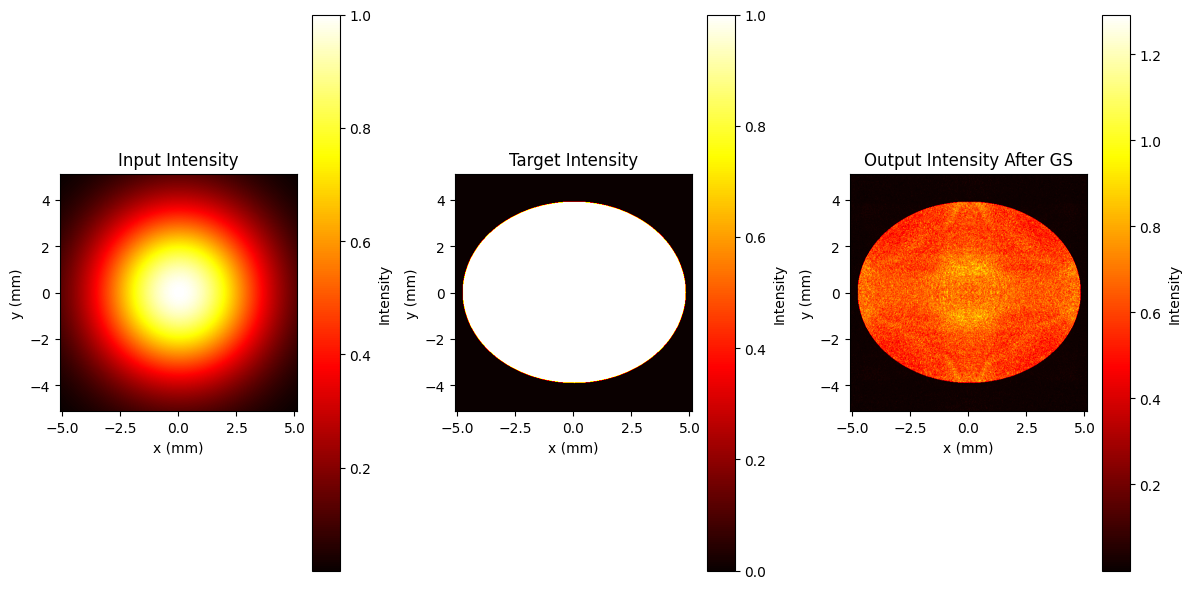

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mm = 1e-3  # millimeter to meter
nm = 1e-9  # nanometer to meter
lambda_ = 532 * nm  # wavelength
k = 2 * np.pi / lambda_  # wavenumber
SL = 10.24 * mm  # side length of aperture
N = 512  # number of grid samples
dx = SL / N  # sampling interval
d = 200 * mm  # propagation distance

# Spatial grid
x = np.linspace(-0.5 * SL, 0.5 * SL - dx, N)
y = np.linspace(-0.5 * SL, 0.5 * SL - dx, N)
X, Y = np.meshgrid(x, y)

# Input Gaussian beam
beam_waist = 5.12 * mm
I_input = np.exp(-2 * ((X / beam_waist) ** 2 + (Y / beam_waist) ** 2))

# Desired target intensity pattern
a, b = 4.8 * mm, 3.9 * mm
I_target = ((X / a) ** 2 + (Y / b) ** 2 <= 1).astype(float)

def angular_spectrum(u0, L, lambda_, z):
    N = u0.shape[0]
    dx = L / N
    fx = np.fft.fftfreq(N, d=dx)
    FX, FY = np.meshgrid(fx, fx)
    H = np.exp(1j * k * z * np.sqrt(1 - (lambda_ * FX)**2 - (lambda_ * FY)**2))
    H = np.fft.fftshift(H)
    G0 = np.fft.fft2(np.fft.fftshift(u0))
    G1 = H * G0
    u1 = np.fft.ifftshift(np.fft.ifft2(G1))
    return u1

def gerchberg_saxton(I_input, I_target, L, lambda_, d, iterations=10):

    u = np.sqrt(I_input)
    target_amplitude = np.sqrt(I_target)

    for _ in range(iterations):

        u = angular_spectrum(u, L, lambda_, d)
        u = target_amplitude * np.exp(1j * np.angle(u))
        u = angular_spectrum(u, L, lambda_, -d)
        u = np.sqrt(I_input) * np.exp(1j * np.angle(u))

    return u

iterations = 20
u_refined = gerchberg_saxton(I_input, I_target, SL, lambda_, d, iterations)
I_output = np.abs(angular_spectrum(u_refined, SL, lambda_, d)) ** 2

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(I_input, extent=[-SL/2/mm, SL/2/mm, -SL/2/mm, SL/2/mm], cmap='hot')
plt.colorbar(label='Intensity')
plt.title("Input Intensity")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

plt.subplot(1, 3, 2)
plt.imshow(I_target, extent=[-SL/2/mm, SL/2/mm, -SL/2/mm, SL/2/mm], cmap='hot')
plt.colorbar(label='Intensity')
plt.title("Target Intensity")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

plt.subplot(1, 3, 3)
plt.imshow(I_output, extent=[-SL/2/mm, SL/2/mm, -SL/2/mm, SL/2/mm], cmap='hot')
plt.colorbar(label='Intensity')
plt.title("Output Intensity After GS")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

plt.tight_layout()
plt.show()


You can manipulate light using a DOE, a freeform lens, or a metasurface. Compare and explore the advantages and disadvantages of each technique in the context of both imaging and nonimaging applications.

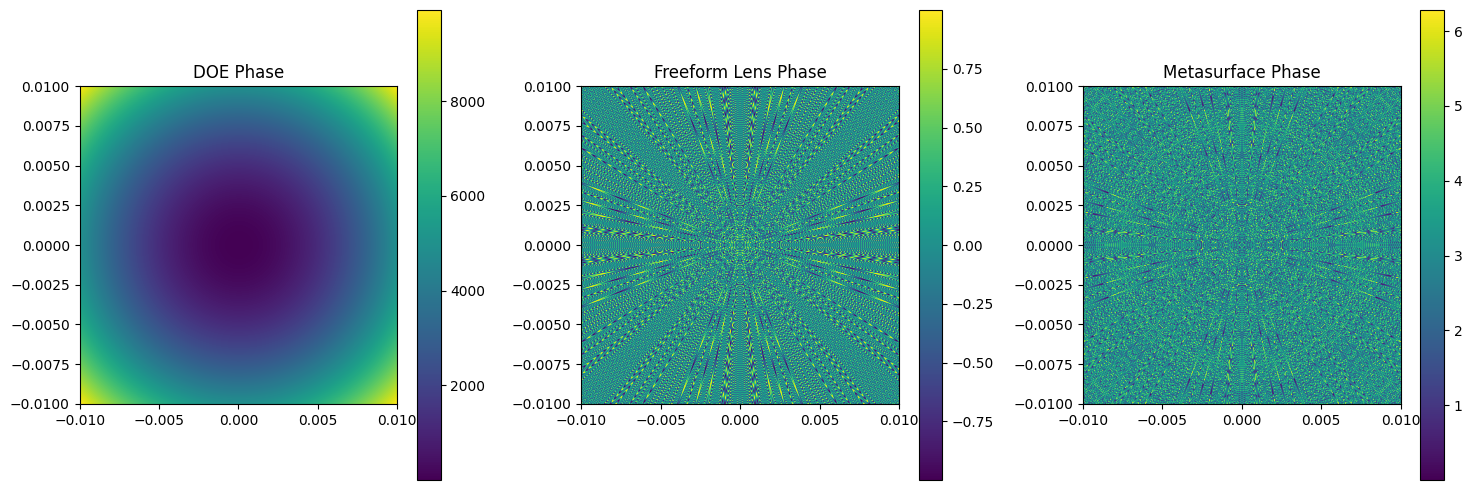

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

wavelength = 632.8e-9  # Wavelength in meters
aperture_diameter = 0.01  # Aperture diameter in meters
focal_length = 0.1  # Focal length in meters

# Define grid for simulation
grid_size = 500  # Grid resolution
grid_range = 0.01  # Grid range in meters
x = np.linspace(-grid_range, grid_range, grid_size)
y = np.linspace(-grid_range, grid_range, grid_size)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

phase_doe = 2 * np.pi * (R**2) / (2 * wavelength * focal_length)

phase_freeform = np.sin(2 * np.pi * R / wavelength)

phase_metasurface = np.mod(2 * np.pi * R / wavelength, 2 * np.pi)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
titles = ["DOE Phase", "Freeform Lens Phase", "Metasurface Phase"]
phases = [phase_doe, phase_freeform, phase_metasurface]

for ax, phase, title in zip(axs, phases, titles):
    im = ax.imshow(phase, extent=[-grid_range, grid_range, -grid_range, grid_range], cmap="viridis")
    ax.set_title(title)
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()


# **From Homework #1: **

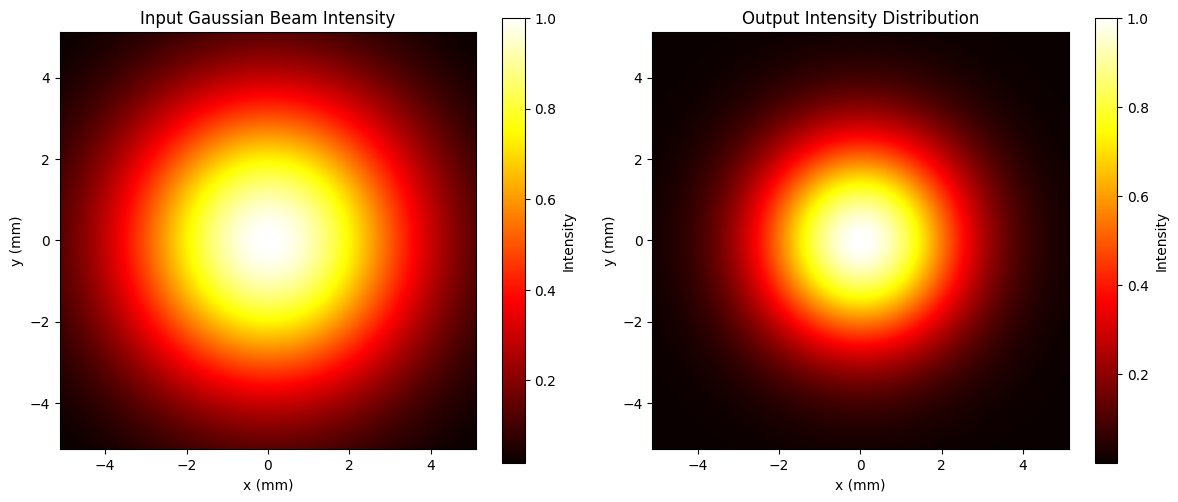

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
mm = 1e-3  # Millimeters to meters conversion
nm = 1e-9  # Nanometers to meters conversion
lambda_wave = 532 * nm  # Wavelength in meters
k = 2 * np.pi / lambda_wave  # Wave number
n = 1.494  # Refractive index of PMMA

SL = 10.24 * mm
N = 512
dx = SL / N
d = 200 * mm

x = np.linspace(-0.5 * SL, 0.5 * SL - dx, N)
y = np.linspace(-0.5 * SL, 0.5 * SL - dx, N)
X, Y = np.meshgrid(x, y)

I_input = np.exp(-2 * ((X / (0.5 * SL))**2 + (Y / (0.5 * SL))**2))

def AngularSpectrum(u0, L, lambda_wave, z):
    N = u0.shape[0]
    dx = L / N
    k = 2 * np.pi / lambda_wave

    fx = np.fft.fftfreq(N, d=dx)
    FX, FY = np.meshgrid(fx, fx)
    H = np.exp(1j * k * z * np.sqrt(1 - (lambda_wave**2) * (FX**2 + FY**2)))

    U0 = np.fft.fft2(np.fft.fftshift(u0))
    U1 = H * U0
    u1 = np.fft.ifftshift(np.fft.ifft2(U1))
    return u1

u_output = AngularSpectrum(I_input, SL, lambda_wave, d)

I_output = np.abs(u_output)**2
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(I_input, extent=[-SL/2/mm, SL/2/mm, -SL/2/mm, SL/2/mm], cmap='hot')
plt.title("Input Gaussian Beam Intensity")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar(label="Intensity")

plt.subplot(1, 2, 2)
plt.imshow(I_output, extent=[-SL/2/mm, SL/2/mm, -SL/2/mm, SL/2/mm], cmap='hot')
plt.title("Output Intensity Distribution")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar(label="Intensity")

plt.tight_layout()
plt.show()
